# **1 - Enmarcar el problema**



🧭 Definición del Problema – Clasificación: Predicción de Fallos en Sensores

🎯 Objetivo de negocio

Desarrollar un modelo de Machine Learning capaz de predecir fallos en sensores o máquinas a partir de lecturas operativas, con el fin de anticipar incidentes, reducir tiempos de inactividad y optimizar los planes de mantenimiento.

La detección temprana de fallos permitirá implementar estrategias de mantenimiento predictivo, evitando paradas no planificadas y mejorando la eficiencia general del sistema.

🧰 Uso de la solución

El modelo clasificará si existe riesgo de fallo (fail = 1).
En caso de detectar dicho riesgo, se generará una alerta temprana para que el equipo técnico pueda intervenir antes de que se produzca el fallo real.

Esto se traduce en una reducción de costes operativos y una mayor fiabilidad en los equipos monitorizados.

📊 Tipo de problema

Tipo: Supervisado (Clasificación binaria)

Variable objetivo: fail → (1 = fallo, 0 = no fallo)

Variables predictoras:

footfall: Número de personas u objetos que pasan por la máquina.

tempMode: Modo o ajuste de temperatura de la máquina.

AQ: Índice de calidad del aire.

USS: Lectura del sensor ultrasónico (proximidad).

CS: Sensor de corriente (consumo eléctrico).

VOC: Nivel de compuestos orgánicos volátiles.

RP: Revoluciones por minuto (RPM).

IP: Presión de entrada.

Temperature: Temperatura operativa de la máquina.

🧮 Métricas de evaluación

Accuracy: rendimiento global del modelo.

Precision: proporción de alertas que fueron realmente fallos.

Recall: proporción de fallos reales que el modelo logró detectar.

F1-score: equilibrio entre Precision y Recall.

Matriz de confusión: análisis detallado de los errores.

👉 Se prioriza el Recall, ya que en un entorno industrial es crítico minimizar los falsos negativos (fallos no detectados), pues pueden implicar altos costes o paradas de producción.

📈 Criterio de rendimiento mínimo

Recall ≥ 80 % → Detectar al menos 8 de cada 10 fallos reales.

Interpretación: De todos los fallos que realmente ocurrieron, ¿cuántos detectó el modelo?

Precision ≥ 70 % → Evitar un exceso de falsas alarmas.

Interpretación: De todas las alertas que el modelo generó, ¿cuántas eran fallos reales?

📌 Estos valores se consideran razonables para un modelo base inicial.
En un entorno industrial real, los umbrales se ajustarían según el coste de los errores (falsos positivos vs falsos negativos).

✅ Resultado esperado:
Construir un modelo robusto capaz de anticipar fallos con alta sensibilidad, sirviendo como base para un sistema de mantenimiento predictivo industrial.

# **2 - Carga de datos**

In [ ]:
# Importar datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Paso 1: Montar Google Drive para acceder a archivos directamente desde Drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Paso 2: Definir la ruta del archivo y leerlo directamente desde Drive
# IMPORTANTE: Cambia esta ruta por la ubicación de tu dataset en TU Google Drive o TU equipo local


file_path = "/content/drive/MyDrive/Alejandro/NODD3R/Bootcamp DS/4-Reto DS y ML/Mis proyectos/PROYECTO Clasificación-Predicción fallo sensores/dataset prediccion fallo sensores.csv"  # Ruta al archivo en mi Drive

df_fallosensores = pd.read_csv(file_path)
df_fallosensores.head()


,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


### **Conclusiones de la Carga de datos**

En este paso se carga el dataset original desde Google Drive y se realiza una comprobación rápida de su estructura.  
El archivo contiene lecturas de distintos sensores junto con la variable objetivo **fail** (0 = sin fallo, 1 = con fallo).

Se verifica que:
- Los nombres de columnas y tipos de datos sean correctos.  
- No existan errores de lectura ni inconsistencias evidentes en la cabecera.  
- La variable objetivo fail esté correctamente codificada como binaria.

Los datos se han cargado correctamente y quedan listos para el análisis exploratorio (EDA).


# **3 - EDA**

## **EDA - 1) Visión general del dataset**

In [ ]:
# EDA - 1) VISIÓN GENERAL DEL DATASET

# Forma del dataset (número de filas y columnas)
print("Shape del dataset:", df_fallosensores.shape)

# Tipos de datos por columna
print("\nTipos de datos:")
print(df_fallosensores.dtypes)

# Primeras y últimas filas para comprobar la carga
print("\nPrimeras filas:")
display(df_fallosensores.head())

print("\nÚltimas filas:")
display(df_fallosensores.tail())

# Recuento de valores únicos por columna
print("\nValores únicos por columna:")
for col in df_fallosensores.columns:
    print(f"{col}: {df_fallosensores[col].nunique()} valores únicos")

# Información general del DataFrame
print("\nResumen general del DataFrame:")
df_fallosensores.info()


Shape del dataset: (944, 10)

Tipos de datos:
footfall       int64
tempMode       int64
AQ             int64
USS            int64
CS             int64
VOC            int64
RP             int64
IP             int64
Temperature    int64
fail           int64
dtype: object

Primeras filas:


,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0



Últimas filas:


,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1
943,18,7,4,2,6,3,61,7,24,1



Valores únicos por columna:
footfall: 99 valores únicos
tempMode: 8 valores únicos
AQ: 7 valores únicos
USS: 7 valores únicos
CS: 7 valores únicos
VOC: 7 valores únicos
RP: 71 valores únicos
IP: 7 valores únicos
Temperature: 24 valores únicos
fail: 2 valores únicos

Resumen general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


## **EDA - 2) Diccionario de datos y comprobaciones básicas de coherencia**

In [ ]:
# EDA - 2) DICCIONARIO DE DATOS Y COMPROBACIONES BÁSICAS DE COHERENCIA

# Objetivo:
# Comprobar que los datos tienen coherencia básica y detectar posibles valores imposibles.

# 2.1️ - Revisamos el nombre de las columnas
print("Columnas del dataset:")
print(df_fallosensores.columns.tolist())


# 2️.2 - Diccionario de datos (documentación de variables)
diccionario = {
    'footfall': 'Número de personas detectadas (conteo, no puede ser negativo)',
    'tempMode': 'Modo de temperatura configurado (valores discretos 1–8)',
    'AQ': 'Calidad del aire (Air Quality) medida en niveles 1–7',
    'USS': 'Sensor ultrasónico — lectura discreta',
    'CS': 'Sensor de corriente eléctrica — nivel o estado discreto',
    'VOC': 'Compuestos orgánicos volátiles (Volatile Organic Compounds), escala 1–7',
    'RP': 'Lectura continua (resistencia o presión, depende del sensor)',
    'IP': 'Sensor o indicador de potencia/corriente inversa (niveles discretos 1–7)',
    'Temperature': 'Temperatura medida (°C u otra unidad)',
    'fail': 'Variable objetivo: 1 = fallo, 0 = sin fallo'
}

print("\nDiccionario de datos:")
for var, desc in diccionario.items():
    print(f"- {var}: {desc}")

# 2.3️ - Resumen estadístico general
print("\nResumen estadístico de variables numéricas:")
print(df_fallosensores.describe())

# 2.4️ - Comprobaciones básicas
print("\nConteo de valores negativos en variables que no deberían ser negativas:")
columnas_no_negativas = ['footfall', 'VOC']

for col in columnas_no_negativas:
    negativos = (df_fallosensores[col] < 0).sum()
    print(f"{col}: {negativos} valores negativos")

# Conclusión:
# - Los conteos (footfall) no pueden ser negativos.
# - VOC tampoco debería tener valores negativos al medir concentraciones.
# - Este paso permite detectar incoherencias sin modificar los datos.


Columnas del dataset:
['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature', 'fail']

Diccionario de datos:
- footfall: Número de personas detectadas (conteo, no puede ser negativo)
- tempMode: Modo de temperatura configurado (valores discretos 1–8)
- AQ: Calidad del aire (Air Quality) medida en niveles 1–7
- USS: Sensor ultrasónico — lectura discreta
- CS: Sensor de corriente eléctrica — nivel o estado discreto
- VOC: Compuestos orgánicos volátiles (Volatile Organic Compounds), escala 1–7
- RP: Lectura continua (resistencia o presión, depende del sensor)
- IP: Sensor o indicador de potencia/corriente inversa (niveles discretos 1–7)
- Temperature: Temperatura medida (°C u otra unidad)
- fail: Variable objetivo: 1 = fallo, 0 = sin fallo

Resumen estadístico de variables numéricas:
          footfall    tempMode          AQ         USS          CS  \
count   944.000000  944.000000  944.000000  944.000000  944.000000   
mean    306.381356    3.727754    4.325212    

## **EDA - 3) Análisis del target (fail)**

Conteos por clase (sin NaN):
fail
0    551
1    393
Name: count, dtype: int64

Proporciones por clase (sin NaN):
fail
0    0.583686
1    0.416314
Name: proportion, dtype: float64

Detalle por clase (conteo y porcentaje):
- Clase 0: 551 observaciones (58.37%)
- Clase 1: 393 observaciones (41.63%)


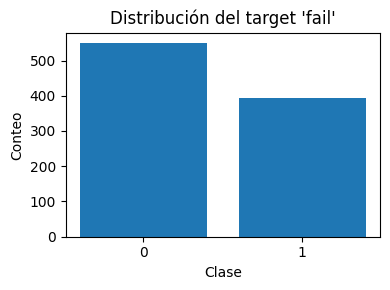

In [ ]:
# EDA - 3) ANÁLISIS DEL TARGET (fail)

# Objetivo:
# Analizar el balance de clases en la variable objetivo 'fail' mediante conteos,
# proporciones y una visualización simple del desbalance.

# 3.1️ - Conteos absolutos por clase
counts = df_fallosensores['fail'].value_counts()
print("Conteos por clase (sin NaN):")
print(counts)

# 3.2️ - Proporciones por clase (frecuencia relativa)
ratios = df_fallosensores['fail'].value_counts(normalize=True)
print("\nProporciones por clase (sin NaN):")
print(ratios)

# Detalle combinado (conteo y porcentaje)
print("\nDetalle por clase (conteo y porcentaje):")
for clase, conteo in counts.items():
    proporcion = ratios.get(clase, 0)
    print(f"- Clase {clase}: {conteo} observaciones ({proporcion:.2%})")

# 3.3️ - Gráfico de barras simple
plt.figure(figsize=(4, 3))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Distribución del target 'fail'")
plt.xlabel("Clase")
plt.ylabel("Conteo")
plt.tight_layout()
plt.show()


## **EDA - 4) Valores nulos y calidad de los datos**

In [ ]:
# EDA - 4) VALORES NULOS Y CALIDAD DE DATOS

# 4.1 - Conteo absoluto de nulos por columna
print("Conteo de valores nulos por variable:")
nulos_totales = df_fallosensores.isnull().sum()
print(nulos_totales)

# 4.2 - Porcentaje de nulos por columna
print("\nPorcentaje de valores nulos por variable:")
porcentaje_nulos = df_fallosensores.isnull().mean() * 100
print(porcentaje_nulos.round(2))

# 4.3 - Resumen
columnas_con_nulos = (nulos_totales > 0).sum()
print("\nResumen:")
print(f"- Columnas con valores nulos: {columnas_con_nulos} de {len(df_fallosensores.columns)} totales.")
if columnas_con_nulos == 0:
    print("No hay valores nulos en el dataset.")
else:
    print("Hay variables con valores faltantes que deberán revisarse en el preprocesamiento.")


Conteo de valores nulos por variable:
footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

Porcentaje de valores nulos por variable:
footfall       0.0
tempMode       0.0
AQ             0.0
USS            0.0
CS             0.0
VOC            0.0
RP             0.0
IP             0.0
Temperature    0.0
fail           0.0
dtype: float64

Resumen:
- Columnas con valores nulos: 0 de 10 totales.
No hay valores nulos en el dataset.


## **EDA - 5) Duplicados e integridad**

In [ ]:
# EDA - 5) DUPLICADOS E INTEGRIDAD

# 5.1 - Conteo de filas duplicadas
num_duplicados = df_fallosensores.duplicated().sum()
print("Conteo de filas duplicadas (todas las columnas consideradas):")
print(num_duplicados)

# 5.2 - Muestra de duplicados (si existen)
if num_duplicados > 0:
    print("\nMuestra de filas duplicadas:")
    duplicados_sample = df_fallosensores[df_fallosensores.duplicated(keep=False)].head(10)
    print(duplicados_sample)
else:
    print("\nNo se han encontrado filas duplicadas exactas.")

# 5.3 - Resumen final
print("\nResumen:")
if num_duplicados == 0:
    print(f"-  No hay duplicados. (Total duplicados detectados: {num_duplicados})")
else:
    print(f"-  Se detectaron {num_duplicados} filas duplicadas. Revisar en preprocesamiento si procede eliminarlas.")


Conteo de filas duplicadas (todas las columnas consideradas):
1

Muestra de filas duplicadas:
     footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
730        31         5   3    3   6    1  48   6           21     0
766        31         5   3    3   6    1  48   6           21     0

Resumen:
-  Se detectaron 1 filas duplicadas. Revisar en preprocesamiento si procede eliminarlas.


## **EDA - 6) Distribuciones univariantes**

Features numéricas (9): ['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature']


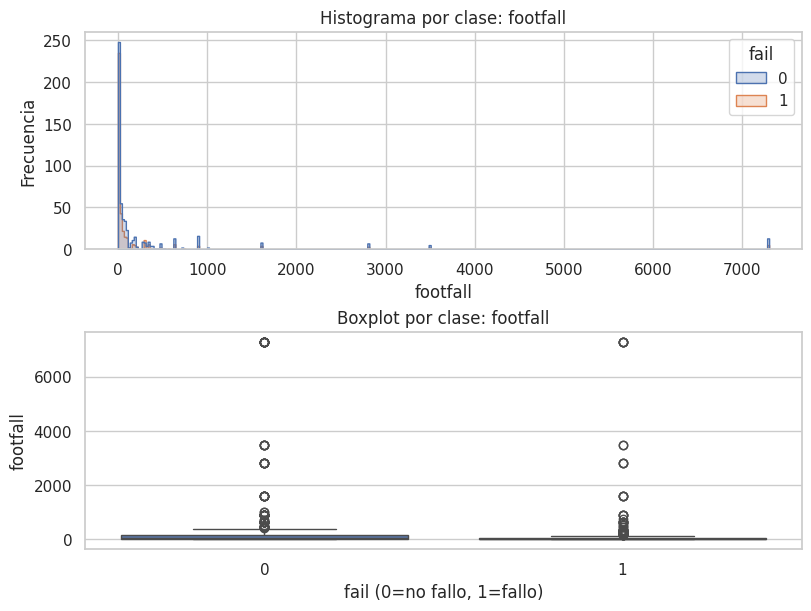

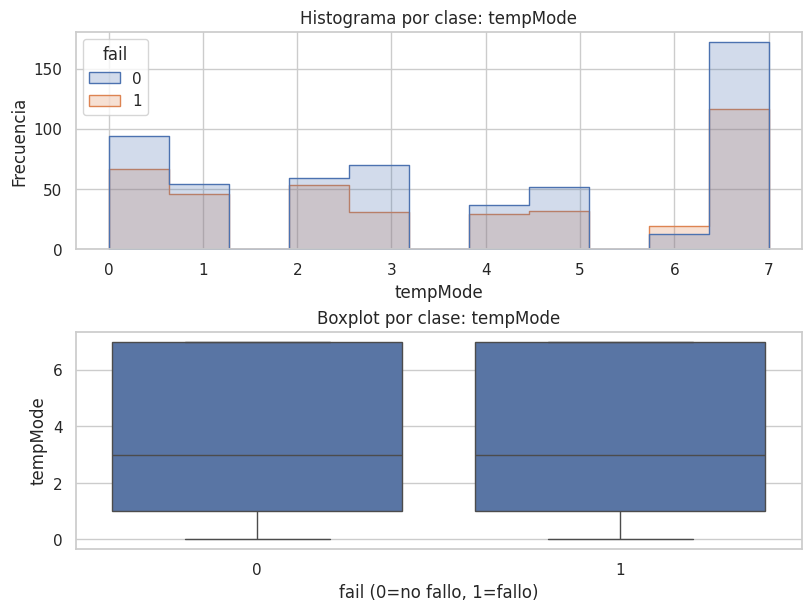

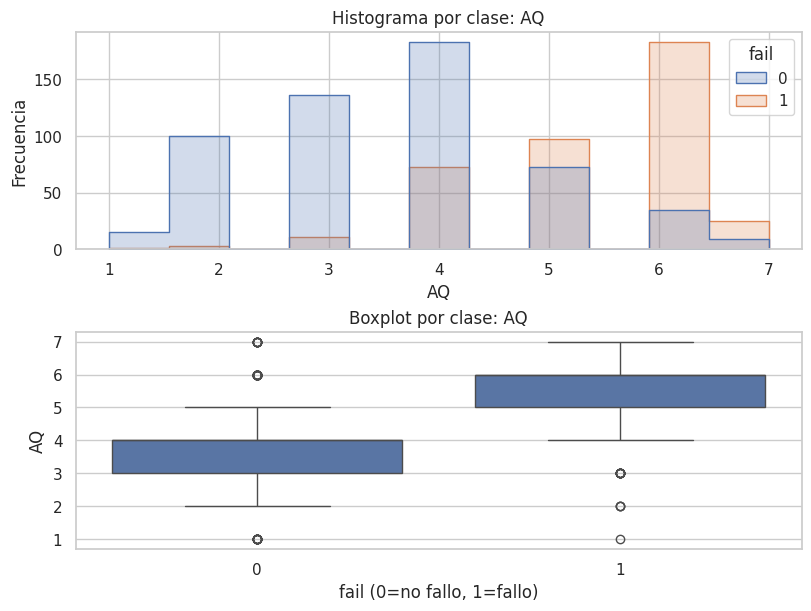

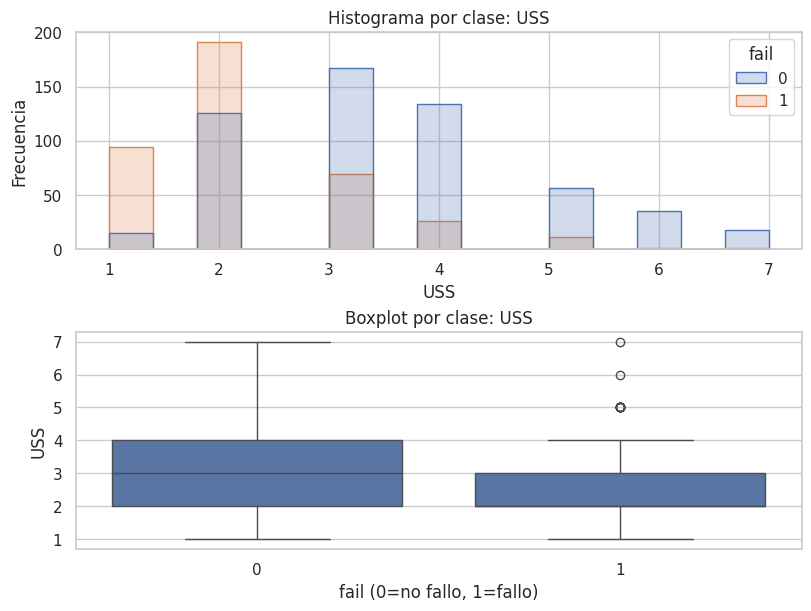

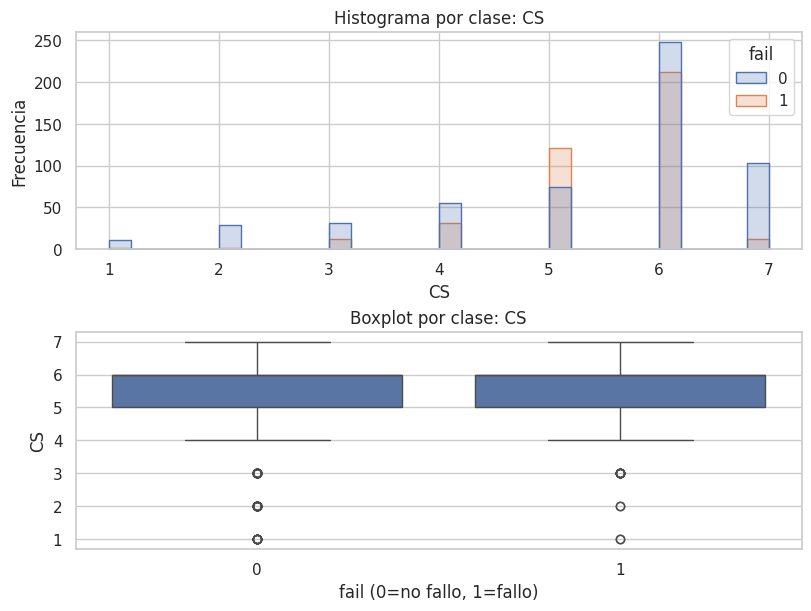

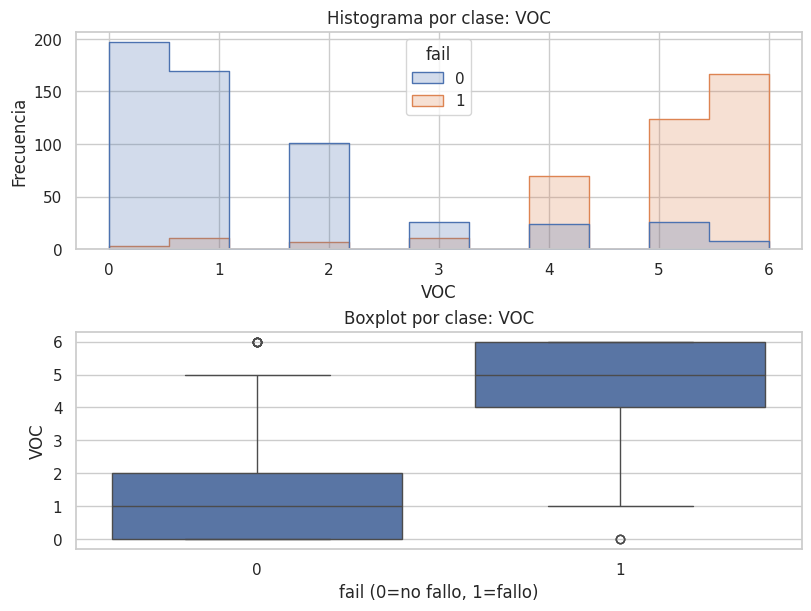

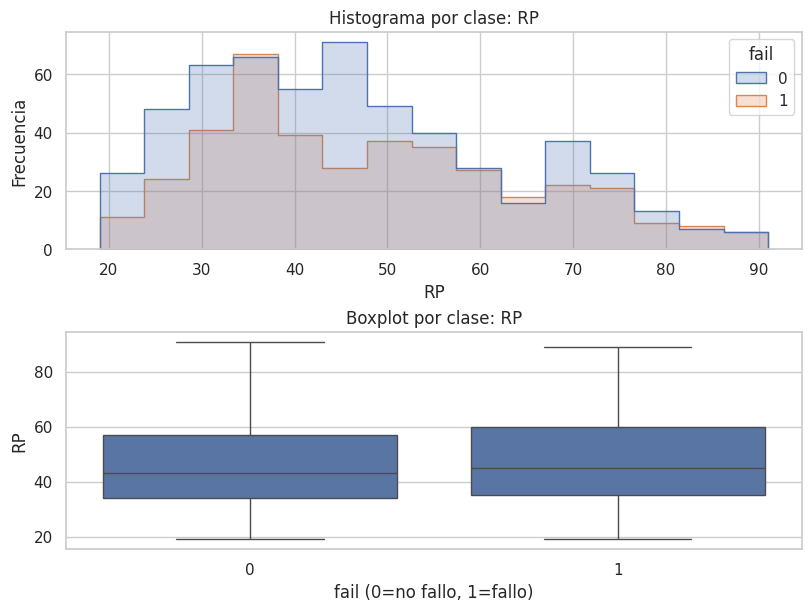

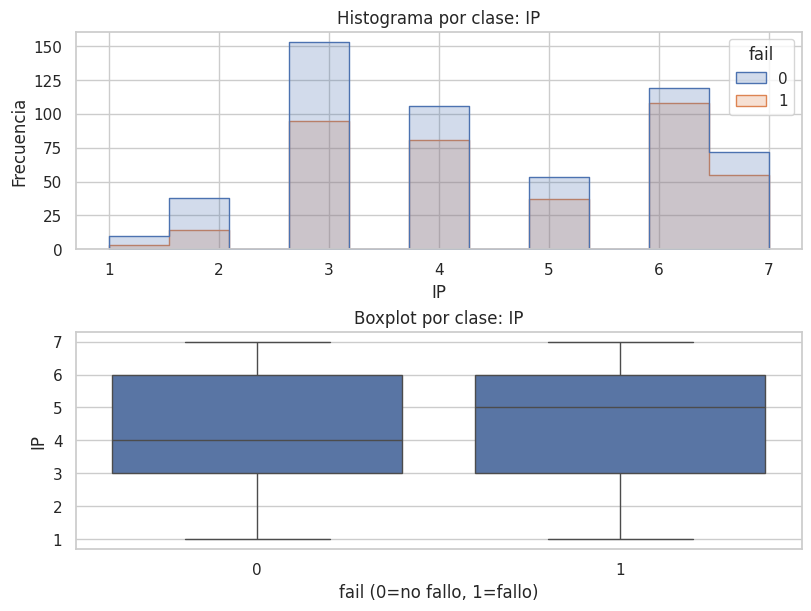

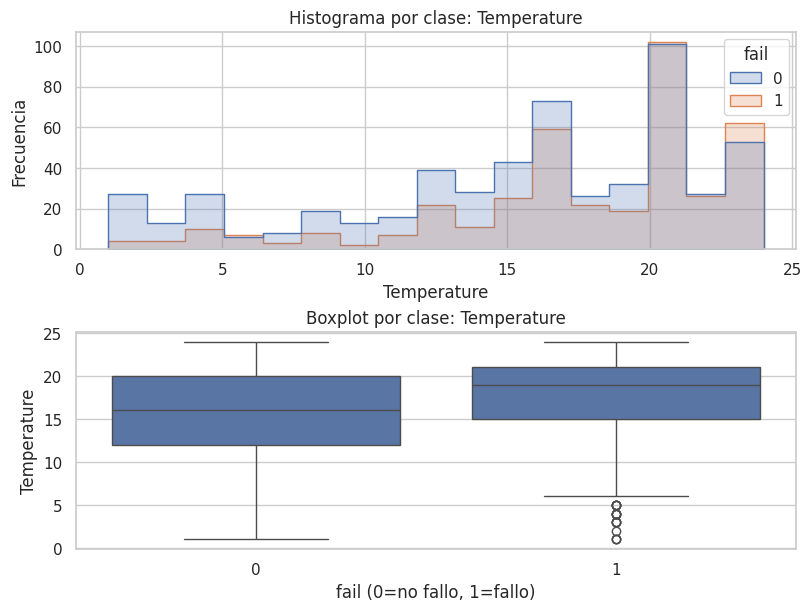


Asimetría (skew) por variable numérica (desc):


,skew
footfall,5.489835
USS,0.811147
RP,0.525106
VOC,0.125040
IP,0.014549
tempMode,-0.019139
AQ,-0.181060
Temperature,-0.915867
CS,-1.337448



Candidatas a log1p (skew > 1.0 y min >= 0):
['footfall']


In [ ]:
# EDA - 6) DISTRIBUCIONES UNIVARIANTES (POR CLASE)

# Selección de features numéricas (excluyendo la variable objetivo)
numeric_cols = df_fallosensores.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('fail')
print(f"Features numéricas ({len(numeric_cols)}): {numeric_cols}")

# Gráficos: histograma (hue='fail') + boxplot por clase
sns.set(style="whitegrid")
for col in numeric_cols:
    fig, axes = plt.subplots(2, 1, figsize=(8, 6), constrained_layout=True)

    sns.histplot(data=df_fallosensores, x=col, hue='fail', element='step', bins='auto', ax=axes[0])
    axes[0].set_title(f"Histograma por clase: {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Frecuencia")

    sns.boxplot(data=df_fallosensores, x='fail', y=col, ax=axes[1])
    axes[1].set_title(f"Boxplot por clase: {col}")
    axes[1].set_xlabel("fail (0=no fallo, 1=fallo)")
    axes[1].set_ylabel(col)

    plt.show()

# Skew por variable numérica (ordenado desc)
skew_series = df_fallosensores[numeric_cols].skew(numeric_only=True)
skew_df = skew_series.sort_values(ascending=False).to_frame(name='skew')
print("\nAsimetría (skew) por variable numérica (desc):")
display(skew_df)

# Candidatas a log1p (NO transformar aquí; solo anotar para preprocesamiento)
candidatas_log = [col for col in numeric_cols
                  if (skew_series[col] > 1.0) and (df_fallosensores[col].min() >= 0)]
print("\nCandidatas a log1p (skew > 1.0 y min >= 0):")
print(candidatas_log if candidatas_log else "Ninguna con este criterio.")



### 🔍 **Interpretación de resultados - Punto 6: Distribuciones por clase (fail=0 vs fail=1)**




Se analizaron las distribuciones de las variables numéricas comparando los casos con fallo ("fail" = 1) frente a los normales ("fail" = 0),
mediante histogramas y boxplots.

- Las variables "VOC", "AQ" y "Temperature" muestran diferencias claras entre ambas clases:  
  - "VOC" mide la concentración de compuestos orgánicos volátiles, y los fallos aumentan cuando este valor es alto, lo que sugiere que la contaminación ambiental puede afectar al sistema.  
  - "AQ" (Air Quality) refleja la calidad del aire, y se observan más fallos cuando la calidad del aire es baja (mayor índice).  
  - "Temperature" mide la temperatura de operación de la máquina; los fallos son más frecuentes cuando la temperatura es alta, lo que podría indicar sobrecalentamiento o exceso de carga térmica.  
- "USS" presenta cierta diferencia en valores bajos: los fallos tienden a aparecer cuando el sensor ultrasónico detecta objetos muy cercanos, lo que podría causar interferencias o lecturas inestables.  
- El resto de variables ("footfall", "tempMode", "CS", "RP" e "IP") muestran distribuciones muy similares entre clases, sin diferencias relevantes que indiquen relación directa con los fallos.

En general, las variables de tipo ambiental y térmico parecen tener mayor relación con la aparición de fallos,
mientras que las de consumo, presión o tráfico de personas mantienen comportamientos estables entre clases.


**Nota sobre asimetría (skew):**  
Solo la variable "footfall" presenta una asimetría fuerte (skew = 5.48),
lo que indica una distribución muy sesgada hacia valores bajos.  
Podría aplicarse una transformación logarítmica (log1p) en el preprocesamiento para estabilizar su escala.


## **EDA - 7) Outliers - Detección con método IQR**


 Resumen IQR por variable (ordenado por % de outliers)


,variable,q1,q3,lower_bound,upper_bound,n_outliers,pct_outliers
0,footfall,1.0,110.0,-162.5,273.5,154,16.31
1,CS,5.0,6.0,3.5,7.5,87,9.22
2,Temperature,14.0,21.0,3.5,31.5,48,5.08
3,AQ,3.0,6.0,-1.5,10.5,0,0.00
4,tempMode,1.0,7.0,-8.0,16.0,0,0.00
5,USS,2.0,4.0,-1.0,7.0,0,0.00
6,VOC,1.0,5.0,-5.0,11.0,0,0.00
7,RP,34.0,58.0,-2.0,94.0,0,0.00
8,IP,3.0,6.0,-1.5,10.5,0,0.00



 Filas con al menos un outlier (IQR)
any_outlier_iqr
False    686
True     258
Name: count, dtype: int64

 Distribución de 'n_outliers_iqr' (cuántas variables outlier por fila) 
n_outliers_iqr
0    686
1    228
2     29
3      1
Name: count, dtype: int64

Variable con mayor % de outliers: 'footfall' (IQR). Mostrando boxplot por clase 'fail'.


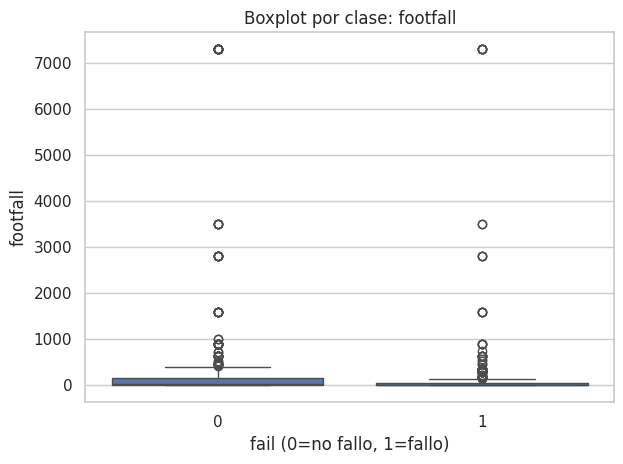

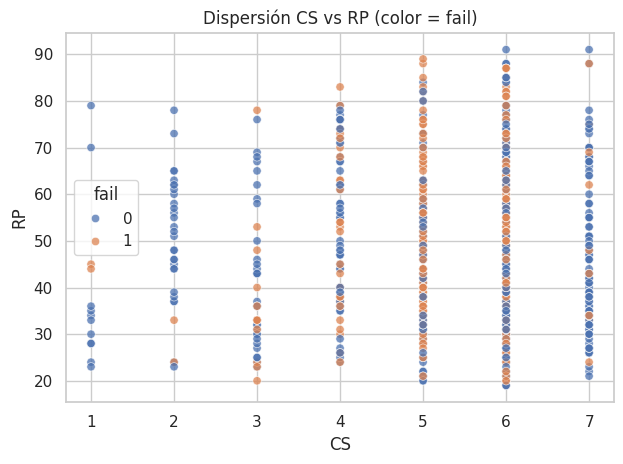

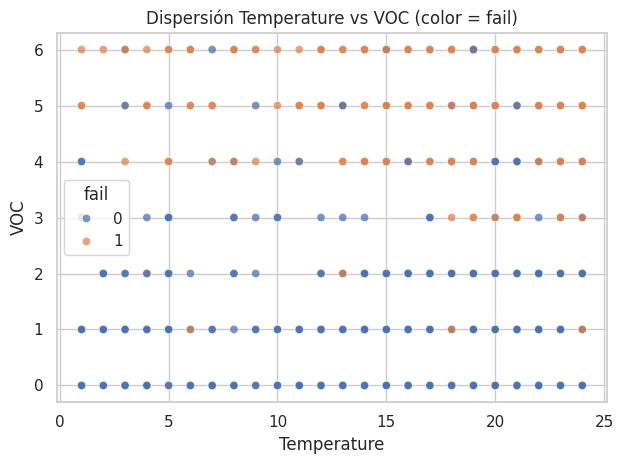

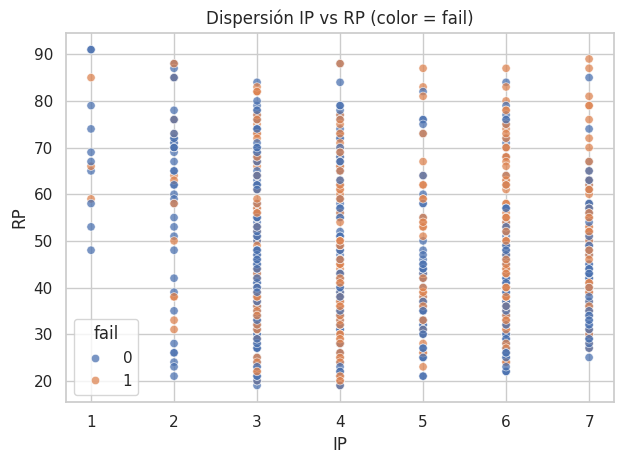

In [ ]:
# EDA - 7) OUTLIERS — Detección con método IQR

# Objetivo: detectar valores atípicos (outliers) por variable usando el método IQR
# y marcar fila a fila en el DataFrame dónde se encuentran.

# Aseguramos que la variable objetivo 'fail' no esté en numeric_cols
numeric_cols = [c for c in numeric_cols if c != 'fail']

#  Función para calcular límites IQR
def iqr_bounds(serie, k=1.5):
    """Devuelve límites inferior y superior por IQR."""
    q1 = serie.quantile(0.25)
    q3 = serie.quantile(0.75)
    iqr = q3 - q1
    low = q1 - k * iqr
    up  = q3 + k * iqr
    return low, up

#  Resumen IQR por variable
iqr_summary_rows = []

for col in numeric_cols:
    s = pd.to_numeric(df_fallosensores[col], errors="coerce")  # columna como float (NaN si error)
    s = s.replace([np.inf, -np.inf], np.nan)                   # elimina infinitos
    s_nonan = s.dropna()                                       # copia sin NaN

    if s_nonan.empty:                                          # si no hay datos válidos
        continue

    # Límites IQR
    low, up = iqr_bounds(s_nonan, k=1.5)

    # Máscaras (True = outlier inferior/superior)
    mask_low = (s < low)
    mask_up  = (s > up)

    # Conteos
    n_low = int(mask_low.sum())
    n_up  = int(mask_up.sum())
    n_tot = int(s_nonan.shape[0])

    # Porcentaje de outliers
    pct = round(((n_low + n_up) / n_tot) * 100, 2) if n_tot else 0.0

    # Guardamos métricas por variable
    iqr_summary_rows.append({
        "variable": col,
        "q1": s_nonan.quantile(0.25),
        "q3": s_nonan.quantile(0.75),
        "lower_bound": low,
        "upper_bound": up,
        "n_outliers": n_low + n_up,
        "pct_outliers": pct
    })

# Tabla resumen ordenada por % de outliers
iqr_df = (pd.DataFrame(iqr_summary_rows)
          .sort_values("pct_outliers", ascending=False)
          .reset_index(drop=True))

print("\n Resumen IQR por variable (ordenado por % de outliers)")
display(iqr_df)

#  Creación de banderas de outliers
flag_cols = []  # guardará nombres de columnas bandera

for col in numeric_cols:
    s = pd.to_numeric(df_fallosensores[col], errors="coerce")
    s = s.replace([np.inf, -np.inf], np.nan)
    s_nonan = s.dropna()

    flag_name = f"{col}_outlier_iqr"

    if s_nonan.empty:                      # sin datos válidos → columna todo False
        df_fallosensores[flag_name] = False
        flag_cols.append(flag_name)
        continue

    low, up = iqr_bounds(s_nonan, k=1.5)   # límites inferior y superior

    # Bandera True/False por fila (uso 's' con NaN para mantener alineación)
    df_fallosensores[flag_name] = (s < low) | (s > up)
    flag_cols.append(flag_name)

#  Agregados por fila
# True si en la fila hay al menos una variable outlier
df_fallosensores["any_outlier_iqr"] = df_fallosensores[flag_cols].any(axis=1) if flag_cols else False

# Nº de variables outlier por fila
df_fallosensores["n_outliers_iqr"] = df_fallosensores[flag_cols].sum(axis=1) if flag_cols else 0

#  Resúmenes rápidos
print("\n Filas con al menos un outlier (IQR)")
print(df_fallosensores["any_outlier_iqr"].value_counts(dropna=False))

print("\n Distribución de 'n_outliers_iqr' (cuántas variables outlier por fila) ")
print(df_fallosensores["n_outliers_iqr"].value_counts().sort_index())

#  Boxplot variable con más % de outliers
if not iqr_df.empty:
    top_var = iqr_df.loc[0, "variable"]
    print(f"\nVariable con mayor % de outliers: '{top_var}' (IQR). Mostrando boxplot por clase 'fail'.")

    if "fail" in df_fallosensores.columns:
        fig, ax = plt.subplots()
        sns.boxplot(data=df_fallosensores, x='fail', y=top_var, ax=ax)
        ax.set_title(f'Boxplot por clase: {top_var}')
        ax.set_xlabel("fail (0=no fallo, 1=fallo)")
        ax.set_ylabel(top_var)
        plt.tight_layout()
        plt.show()
else:
    print("No hay variables con datos válidos para el boxplot.")

#  Scatterplots (outliers multivariantes)
pares_sugeridos = [("CS", "RP"), ("Temperature", "VOC"), ("IP", "RP")]
pares_a_graficar = [(x, y) for (x, y) in pares_sugeridos
                    if (x in df_fallosensores.columns and y in df_fallosensores.columns)]

for x, y in pares_a_graficar:
    fig, ax = plt.subplots()
    sns.scatterplot(data=df_fallosensores, x=x, y=y, hue='fail', alpha=0.75, ax=ax)
    ax.set_title(f'Dispersión {x} vs {y} (color = fail)')
    plt.tight_layout()
    plt.show()


### **Interpretación de resultados — Punto 7: Outliers (método IQR)**

#### Resumen IQR por variable (tabla)
- Aplicamos **IQR** por variable (Q1, Q3, IQR = Q3−Q1; límites `low = Q1 − 1.5·IQR` y `up = Q3 + 1.5·IQR`) para identificar valores fuera de rango.
- La tabla muestra, para cada variable: **Q1**, **Q3**, **límites**, **n_outliers** y **% de outliers** (sobre datos válidos).
- Según tu tabla, la variable con mayor % de outliers es **Footfall**; tras ella destacan **CS** y **Temperature**. El resto de sensores presentan porcentajes bajos o mínimos.
- Este resumen sirve para **priorizar**: primero atendemos a las variables más problemáticas.

---

#### Boxplot de la variable con mayor % de outliers (Footfall)
- Eje X: fail (0 = sin fallo, 1 = fallo). Eje Y: Footfall.
- La **caja** refleja el rango intercuartílico (Q1–Q3); la línea interna es la **mediana**.
- Los **puntos fuera de los “bigotes”** son **outliers** según IQR.
- Se observa **alta dispersión** y presencia de **valores altos** atípicos en Footfall (en ambas clases), lo que confirma el resultado del resumen IQR.

---

#### Scatterplots (dispersión bivariante por clase)
Cada punto es una **fila** (observación). El color indica la clase fail. Buscamos:
- **Relaciones** entre sensores (tendencias/patrones).
- **Separación de clases** (nubes de colores diferenciadas).
- **Outliers multivariantes** (puntos alejados de la nube principal por la combinación de dos sensores).

1) **CS vs RP**
- Distribución **sin tendencia clara** (no se aprecia relación lineal evidente).
- **Colores mezclados** (fail=0 y fail=1 ocupan las mismas zonas): **no hay separación** visual entre clases.
- Hay **puntos algo alejados** del grupo denso principal: candidatos a **outliers multivariantes** (la pareja CS–RP es poco frecuente en esas posiciones).

2) **Temperature vs VOC**
- **VOC** aparece en **niveles discretos** (líneas horizontales claras: 0, 1, 2, 3, 4, 5, 6) y **todos esos niveles muestran una presencia similar**; no se aprecia ningún nivel particularmente raro por baja frecuencia.
- **Temperature** se comporta como variable **continua**; los puntos se distribuyen a lo largo del eje X **sin un patrón de relación evidente** con VOC.
- **No hay separación clara de clases**: los puntos de fail=0 y fail=1 se superponen en los mismos niveles de VOC y rangos de Temperature.
- **No se observan outliers multivariantes evidentes** en este gráfico: no aparecen puntos claramente aislados del “núcleo” de la nube conjunta de Temperature–VOC.


3) **IP vs RP**
- Se observan **franjas verticales** en el eje **IP**: indica que **IP toma valores discretos** (pocos niveles posibles). RP varía más en vertical sobre cada nivel de IP.
- **Colores mezclados** en las mismas franjas/zonas → **no** hay separación clara entre fail=0 y fail=1.
- Puntos alejados de las zonas más densas dentro de alguna franja (IP fijo con RP inusual) pueden señalar **combinaciones atípicas** (outliers multivariantes).

---

#### Conclusiones
- **Footfall** concentra la mayor proporción de outliers (univariantes) y muestra **alta variabilidad** en el boxplot.
- En los **scatterplots**, las clases **no se separan**: los puntos de ambos colores **se solapan** en las mismas regiones. Si hubiera separación, veríamos **nubes diferenciadas** por color (zonas donde casi solo hay fail=0 o casi solo fail=1).
- Aun sin separación, los scatterplots ayudan a detectar **outliers multivariantes**: observaciones que **no** son extremas en una variable aislada, pero **sí** en la **combinación** de dos sensores (puntos alejados del “núcleo” de la nube).  Sin embargo, **en este caso no se aprecian puntos aislados ni combinaciones claramente anómalas**: las nubes de puntos son compactas y no muestran valores fuera del patrón general.
- Este análisis guía el **preprocesamiento**: revisar Footfall (transformación/robustez), considerar **escalado** y, si es relevante, técnicas específicas para **detección de anomalías multivariantes**.


## **EDA - 8) Correlaciones y Multicolinealidad**

In [ ]:
# EDA 8) Correlaciones y Multicolinealidad
# - Pearson entre numéricas y correlación de cada variable con 'fail'
# - Detección de pares con multicolinealidad (|r| >= 0.90)

# 8.1 - Matriz de correlación (incluye 'fail' para leer su columna)
cols_for_corr = numeric_cols + ['fail']
corr_matrix = df_fallosensores[cols_for_corr].corr()

# 8.2 - Correlación con 'fail' (ordenada)
corr_with_fail = (
    corr_matrix['fail']
    .drop('fail')
    .sort_values(ascending=False)
)

print("\n[Correlación con 'fail' (ordenada de mayor a menor)]")
print(corr_with_fail)
print("\nTop 5 variables más correlacionadas con 'fail':")
print(corr_with_fail.head(5).round(3))

# 8.3 - Multicolinealidad entre predictoras (solo numeric_cols)
pred_corr = df_fallosensores[numeric_cols].corr()
umbral = 0.90

pairs = []
cols = pred_corr.columns.tolist()
for i in range(len(cols)):                  # recorro filas
    for j in range(i + 1, len(cols)):       # recorro columnas por encima de la diagonal
        r = pred_corr.iloc[i, j]
        if pd.notna(r) and abs(r) >= umbral:
            pairs.append((cols[i], cols[j], float(r)))

# 8.4 - Tabla de pares con alta correlación (ordenada por |r|)
high_corr_pairs = pd.DataFrame(pairs, columns=['var_1', 'var_2', 'pearson_r'])
if not high_corr_pairs.empty:
    high_corr_pairs['abs_r'] = high_corr_pairs['pearson_r'].abs()
    high_corr_pairs = (
        high_corr_pairs
        .sort_values('abs_r', ascending=False)
        .reset_index(drop=True)
    )

print(f"\n[Pares con |r| >= {umbral} → posible multicolinealidad]")
if high_corr_pairs.empty:
    print("No se detectaron pares con alta correlación.")
else:
    print(high_corr_pairs[['var_1', 'var_2', 'pearson_r']].round(3))



[Correlación con 'fail' (ordenada de mayor a menor)]
VOC            0.797329
AQ             0.583238
Temperature    0.190257
IP             0.085624
RP             0.053668
CS             0.018855
tempMode      -0.014462
footfall      -0.073066
USS           -0.466574
Name: fail, dtype: float64

Top 5 variables más correlacionadas con 'fail':
VOC            0.797
AQ             0.583
Temperature    0.190
IP             0.086
RP             0.054
Name: fail, dtype: float64

[Pares con |r| >= 0.9 → posible multicolinealidad]
No se detectaron pares con alta correlación.


### **Interpretación de resultados — Punto 8: Correlaciones y Multicolinealidad**

El análisis de correlación de Pearson muestra que la variable VOC es la que presenta mayor relación con fail (r ≈ 0.80), seguida por AQ (r ≈ 0.58).  
Esto indica que ambas variables podrían influir en la aparición de fallos (fail = 1).

Otras variables como Temperature, IP y RP muestran correlaciones más bajas, mientras que USS presenta una correlación negativa moderada, lo que sugiere una relación inversa con el fallo (a mayor USS, menor probabilidad de fallo).

No se detectaron pares de variables con correlación alta entre sí (|r| ≥ 0.90), por lo tanto no hay evidencia de multicolinealidad significativa en este conjunto de datos.  
Esto implica que las variables numéricas no aportan información redundante entre ellas.

En esta etapa no se eliminan variables, solo se registran observaciones:
- Variables más correlacionadas con fail → potencialmente informativas.  
- Ausencia de multicolinealidad fuerte → no se requiere eliminar ninguna variable por redundancia.


## **EDA - 9) Umbrales y rangos**

In [ ]:
# EDA – 9) UMBRALES y RANGOS
# Objetivo:
#   Detectar tramos (bins) de variables continuas donde la tasa de fallo (fail=1) aumenta,
#   para identificar posibles umbrales o rangos de riesgo.

# 9.1 - Selección de variables continuas y categóricas
# Criterio:
#   - CONTINUAS → miden una magnitud física o cuantitativa (temperatura, presión, etc.).
#   - CATEGÓRICAS → representan un estado o modo de funcionamiento.
#   - La variable objetivo 'fail' no se analiza como explicativa.

var_continuas = [
    'footfall', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature'
]

var_categoricas = [
    'tempMode',  # modo de funcionamiento → categórica
    'fail'       # variable objetivo → excluida
]

print("Variables continuas para análisis de umbrales/rangos:\n", var_continuas, "\n")
print("Variables categóricas/excluidas:\n", var_categoricas, "\n")

# 9.2 - Definición de parámetros globales del análisis
# q_bins: número de cuantiles (5 = quintiles)
# min_n: tamaño mínimo por bin para considerar la tasa fiable
# factor: umbral multiplicativo que indica un salto relevante en la tasa de fallo
# ref_tipo: referencia usada para comparar tasas ("prev" o "global")

q_bins   = 5
min_n    = 30
factor   = 1.5
ref_tipo = "prev"

print(f"Parámetros → q_bins={q_bins}, min_n={min_n}, factor={factor}, ref_tipo='{ref_tipo}'")


Variables continuas para análisis de umbrales/rangos:
 ['footfall', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature'] 

Variables categóricas/excluidas:
 ['tempMode', 'fail'] 

Parámetros → q_bins=5, min_n=30, factor=1.5, ref_tipo='prev'


In [ ]:
# EDA – 9) UMBRALES y RANGOS
# Crear bins por cuantiles y tabla resumen (n, bin_low, bin_high).

# 9.3 - Función: crea bins por cuantiles para una variable
def bin_variable_by_quantiles(df, var, q=5):
    """
    Crea bins por cuantiles para 'var' y devuelve:
      - bin_col: Serie categórica con el bin por fila.
      - info_df: Tabla resumen por bin (var, n, min, max).
    """
    # 9.3.1) Convertir a float y seleccionar valores no nulos
    s = df[var].astype(float)
    mask_nonan = s.notna()
    s_nonan = s[mask_nonan]

    # 9.3.2) Crear bins por cuantiles (reduce bins si hay cortes repetidos)
    bins = pd.qcut(s_nonan, q=q, duplicates='drop')

    # 9.3.3) Reinyectar los bins al índice original (manteniendo NaN donde no había dato)
    bin_col = pd.Series(pd.NA, index=df.index, name=f"{var}_bin")
    bin_col.loc[mask_nonan] = bins

    # 9.3.4) Tabla resumen por bin: nº de casos y bordes reales
    grp = s_nonan.groupby(bins)
    info_df = grp.agg(n=('size'), bin_low=('min'), bin_high=('max')).reset_index(names='bin')
    info_df.insert(0, 'var', var)

    return bin_col, info_df


# 9.4 - Aplicar la función a todas las variables continuas
df_bins = df_fallosensores.copy()  # copia donde añadiremos las columnas <var>_bin
bin_info_list = []

for v in var_continuas:
    v_bin_col, v_info_df = bin_variable_by_quantiles(df_fallosensores, v, q=q_bins)
    df_bins[v_bin_col.name] = v_bin_col       # añade columna con los bins
    bin_info_list.append(v_info_df)           # guarda la info de cada variable

# 9.5 - Unir la información de todos los bins
bin_info = pd.concat(bin_info_list, ignore_index=True)

# 9.6 - Comprobaciones básicas
print("Resumen de bins (primeras filas):")
print(bin_info.head(), "\n")

ejemplo = var_continuas[0]
print(f"Conteo por bin para '{ejemplo}':")
print(df_bins[f"{ejemplo}_bin"].value_counts(dropna=False).sort_index(), "\n")

# Nota: si hay menos de q_bins en alguna variable, es normal por 'duplicates=drop'.
# A continuación se calculará la tasa de fallo por bin.


Resumen de bins (primeras filas):
        var              bin    n  bin_low  bin_high
0  footfall   (-0.001, 11.0]  383      0.0      11.0
1  footfall     (11.0, 40.0]  193     12.0      40.0
2  footfall    (40.0, 174.0]  179     42.0     170.0
3  footfall  (174.0, 7300.0]  189    180.0    7300.0
4        AQ     (0.999, 3.0]  266      1.0       3.0 

Conteo por bin para 'footfall':
footfall_bin
(-0.001, 11.0]     383
(11.0, 40.0]       193
(40.0, 174.0]      179
(174.0, 7300.0]    189
Name: count, dtype: int64 



/tmp/ipython-input-421410000.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = s_nonan.groupby(bins)
/tmp/ipython-input-421410000.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = s_nonan.groupby(bins)
/tmp/ipython-input-421410000.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = s_nonan.groupby(bins)
/tmp/ipython-input-421410000.py:24: FutureWarning: The default of observed=False is deprecated

In [ ]:
# EDA – 9) UMBRALES y RANGOS
# Tasa de fallo (fail=1) por bin para cada variable continua.
# Requiere: df_bins (con <var>_bin), var_continuas, bin_info del PASO 1.

# 9.7 - Cálculo de tasas por bin
failrate_tables = []

for v in var_continuas:
    bin_col = f"{v}_bin"

    # Usar solo filas con bin asignado
    tmp = (
        df_bins.loc[:, ['fail', bin_col]]
               .dropna(subset=[bin_col])
               .copy()
    )

    # Asegurar tipo categórico (ordenado por intervalos)
    if not pd.api.types.is_categorical_dtype(tmp[bin_col]):
        tmp[bin_col] = tmp[bin_col].astype('category')

    # Agregaciones clave por bin
    g = tmp.groupby(bin_col, observed=True)
    agg_df = g.agg(
        n_bin=('fail', 'size'),
        n_fail=('fail', 'sum'),
        fail_rate=('fail', 'mean')
    ).reset_index(names='bin')

    # Identificador de variable y orden
    agg_df.insert(0, 'var', v)
    agg_df = agg_df.sort_values(['var', 'bin']).reset_index(drop=True)

    failrate_tables.append(agg_df)

# Tabla final con todas las variables
failrate_by_bin = pd.concat(failrate_tables, ignore_index=True)

# 9.8 - Añadir metadatos del PASO 1 (límites del bin)
bin_info_ren = bin_info.rename(columns={'n': 'n_from_info'})
failrate_by_bin = failrate_by_bin.merge(
    bin_info_ren[['var', 'bin', 'bin_low', 'bin_high', 'n_from_info']],
    on=['var', 'bin'],
    how='left'
)

# Orden de columnas
cols = ['var', 'bin', 'bin_low', 'bin_high', 'n_bin', 'n_fail', 'fail_rate', 'n_from_info']
cols = [c for c in cols if c in failrate_by_bin.columns]
failrate_by_bin = failrate_by_bin.loc[:, cols]

# Vistazos rápidos
print("Tasa de fallo por bin — vista previa:")
print(failrate_by_bin.head(), "\n")

ejemplo = var_continuas[0]
print(f"Tasas por bin para '{ejemplo}':")
print(
    failrate_by_bin[failrate_by_bin['var'] == ejemplo]
    .sort_values('bin')
    .reset_index(drop=True),
    "\n"
)

# Nota: 'fail_rate' es la métrica clave para detectar umbrales/rangos de riesgo.


Tasa de fallo por bin — vista previa:
        var              bin  bin_low  bin_high  n_bin  n_fail  fail_rate  \
0  footfall   (-0.001, 11.0]      0.0      11.0    383     188   0.490862   
1  footfall     (11.0, 40.0]     12.0      40.0    193      88   0.455959   
2  footfall    (40.0, 174.0]     42.0     170.0    179      62   0.346369   
3  footfall  (174.0, 7300.0]    180.0    7300.0    189      55   0.291005   
4        AQ     (0.999, 3.0]      1.0       3.0    266      15   0.056391   

   n_from_info  
0          383  
1          193  
2          179  
3          189  
4          266   

Tasas por bin para 'footfall':
        var              bin  bin_low  bin_high  n_bin  n_fail  fail_rate  \
0  footfall   (-0.001, 11.0]      0.0      11.0    383     188   0.490862   
1  footfall     (11.0, 40.0]     12.0      40.0    193      88   0.455959   
2  footfall    (40.0, 174.0]     42.0     170.0    179      62   0.346369   
3  footfall  (174.0, 7300.0]    180.0    7300.0    189  

/tmp/ipython-input-1795665353.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(tmp[bin_col]):
/tmp/ipython-input-1795665353.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(tmp[bin_col]):
/tmp/ipython-input-1795665353.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(tmp[bin_col]):
/tmp/ipython-input-1795665353.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(tmp[bin_col]):
/tmp/ipython-input-1795665353.py

In [ ]:
# EDA – 9) UMBRALES y RANGOS - VISTA E INTERPRETACIÓN (tras PASO 9.8)
# Muestra, por variable, los bins con su n y tasa de fallo (%), y un resumen global.
# Requiere: failrate_by_bin (del PASO 2) y var_continuas (del PASO 1).

# (1) Comprobaciones básicas
if 'failrate_by_bin' not in globals():
    raise NameError("No encuentro 'failrate_by_bin'. Ejecuta antes el PASO 2.")
if 'var_continuas' not in globals():
    raise NameError("No encuentro 'var_continuas'. Define la lista como en el PASO 1.")

# (2) Preparación de una vista legible
frb = failrate_by_bin.copy()
frb = frb.sort_values(['var', 'bin']).reset_index(drop=True)  # orden natural por variable y bin
frb['bin_range'] = frb.apply(lambda r: f"[{r['bin_low']}, {r['bin_high']}]", axis=1)
frb['fail_rate_%'] = (frb['fail_rate'] * 100).round(1)

# (3) Tablas por variable
for v in var_continuas:
    sub = frb[frb['var'] == v][['bin_range', 'n_bin', 'fail_rate_%']].copy()
    if sub.empty:
        continue

    print("=" * 72)
    print(f"Variable: {v}")
    print("-" * 72)

    sub_to_show = sub.rename(columns={
        'bin_range':   'rango (bin_low–bin_high)',
        'n_bin':       'n',
        'fail_rate_%': 'fail_rate (%)'
    })
    print(sub_to_show.to_string(index=False))

    # Guía rápida de lectura
    print("\nInterpretación rápida:")
    print(" - Recorre 'fail_rate (%)' en orden de bins.")
    print(" - Saltos grandes entre filas consecutivas sugieren un posible UMBRAL.")
    print(" - Verifica 'n' para asegurar suficiente muestra.\n")

# (4) Resumen global compacto
compact = frb[['var', 'bin_range', 'n_bin', 'fail_rate_%']].rename(
    columns={'var': 'variable', 'bin_range': 'rango', 'n_bin': 'n', 'fail_rate_%': 'fail_rate (%)'}
)

print("=" * 72)
print("RESUMEN GLOBAL (todas las variables y sus bins):")
print("=" * 72)
print(compact.to_string(index=False))

# Guardar a CSV:
# compact.to_csv("resumen_bins_tasas.csv", index=False)
# print("\nArchivo 'resumen_bins_tasas.csv' guardado en el directorio de trabajo.")


Variable: footfall
------------------------------------------------------------------------
rango (bin_low–bin_high)   n  fail_rate (%)
             [0.0, 11.0] 383           49.1
            [12.0, 40.0] 193           45.6
           [42.0, 170.0] 179           34.6
         [180.0, 7300.0] 189           29.1

Interpretación rápida:
 - Recorre 'fail_rate (%)' en orden de bins.
 - Saltos grandes entre filas consecutivas sugieren un posible UMBRAL.
 - Verifica 'n' para asegurar suficiente muestra.

Variable: AQ
------------------------------------------------------------------------
rango (bin_low–bin_high)   n  fail_rate (%)
              [1.0, 3.0] 266            5.6
              [4.0, 4.0] 256           28.5
              [5.0, 5.0] 170           57.1
              [6.0, 6.0] 218           83.9
              [7.0, 7.0]  34           73.5

Interpretación rápida:
 - Recorre 'fail_rate (%)' en orden de bins.
 - Saltos grandes entre filas consecutivas sugieren un posible UMBRAL.
 - Veri

### **Interpretación de resultados – Punto 9: Umbrales y rangos**

En este análisis se agruparon los valores de cada variable continua en rangos (bins) y se calculó la tasa de fallo (fail_rate) dentro de cada tramo.

Este método permitió cuantificar cómo varía la probabilidad de fallo según el valor de cada sensor y detectar umbrales críticos de riesgo.

**Principales hallazgos:**
- VOC y AQ: a mayor valor, aumenta fuertemente la tasa de fallo → alta sensibilidad a contaminación del aire.  
- Footfall, CS y USS: la tasa de fallo disminuye con valores altos → menos fallos en condiciones de mayor actividad.  
- Temperature: riesgo creciente con temperaturas altas → posible sobrecalentamiento.  
- RP e IP: relación débil o sin patrón claro.

**Conclusión:**
Los umbrales detectados permiten identificar valores críticos donde el sistema es más propenso al fallo y servirán como base para crear las variables bandera (flags) y definir características de riesgo en la etapa de preprocesamiento.


## **EDA – 10) DESBALANCE DE CLASES Y ESTRATEGIA**

### 🎯 Objetivo del punto
El propósito de este apartado es analizar el equilibrio entre las clases de la variable objetivo fail, es decir, comprobar si el número de casos con fallo (fail = 1) es muy inferior al de casos sin fallo (fail = 0).  
Cuando eso ocurre, hablamos de desbalance de clases, una situación que puede afectar gravemente el entrenamiento del modelo, ya que éste podría aprender a predecir siempre la clase mayoritaria y seguir obteniendo métricas aparentemente buenas (por ejemplo, un "accuracy" alto), aunque realmente no esté detectando los fallos reales.

En este punto, lo habitual sería:
- Calcular los conteos y proporciones de cada clase (fail=0 y fail=1).
- Detectar si existe un desbalance fuerte (por ejemplo, 90/10 o 95/5).
- Decidir si será necesario aplicar técnicas de corrección (re-muestreo o class_weight).
- Definir qué métricas de evaluación se priorizarán durante el modelado.

---

### 📊 Comprobación del balance en este proyecto
Este análisis ya se realizó previamente en el punto 3 del EDA (Análisis del target), donde se obtuvieron las proporciones:

- fail = 0 → 58.37 %  
- fail = 1 → 41.63 %

Estas cifras muestran que las clases están razonablemente equilibradas (aprox. 60/40), por lo que:
- No es necesario aplicar técnicas de re-muestreo (oversampling o undersampling).  
- Tampoco es necesario ajustar los pesos de clase (class_weight='balanced'), ya que el modelo no sufrirá un sesgo importante hacia una de las clases.

Por tanto, no se repiten aquí los cálculos.  
Solo se deja constancia de la evaluación y las decisiones que guiarán la siguiente fase.

---

### 📏 Métricas de evaluación y su priorización

Aunque el dataset esté equilibrado, en problemas de predicción de fallos lo más importante no es simplemente acertar en general, sino detectar correctamente los casos de fallo reales (fail=1).  
Por ello, se priorizarán las siguientes métricas:

- Recall (Sensibilidad): mide cuántos fallos reales el modelo logra detectar.  
  En este tipo de proyectos, un Recall alto significa que el modelo no está dejando escapar fallos reales, aunque pueda generar alguna falsa alarma.

- F1-Score: combina Precision y Recall en una única métrica equilibrada.  
  Un valor alto de F1 indica un buen compromiso entre detectar muchos fallos (Recall) y mantener un número bajo de falsas alarmas (Precision).

En entornos industriales o de mantenimiento predictivo:
- Recall es la métrica principal, porque no detectar un fallo real (falso negativo) suele ser más grave que emitir una falsa alerta.  
- F1-Score se usa como complemento para asegurar equilibrio entre ambas.

---

### ✅ Conclusión

- El balance de clases se analizó en el punto 3 y se confirmó que es adecuado (≈60/40).  
- No es necesario aplicar correcciones como class_weight ni técnicas de re-muestreo.  
- En la fase de modelado, se priorizarán las métricas Recall y F1-score, por su relevancia en la detección de fallos reales.  
- Este paso se documenta solo a nivel conceptual, sin repetir cálculos, para mantener el flujo limpio y profesional del proyecto.


## **EDA - 11) Necesidad de escalado**

In [ ]:
# EDA – 11) NECESIDAD DE ESCALADO
# Objetivo: revisar magnitudes (min/max) de variables continuas y decidir si sería necesario escalar.
# Nota: el modelo principal será RandomForestClassifier (no requiere escalado); esto es diagnóstico.

# 1) Resumen de continuas (para tener min/max aquí mismo)
print("\nResumen estadístico de las variables continuas (para ver min/max aquí mismo):")
describe_cont = df_fallosensores[var_continuas].describe()  # count, mean, std, min, 25%, 50%, 75%, max
print(describe_cont)

# 2) Tabla compacta: min, max y rango (= max - min)
print("\nRangos por variable (min, max, rango = max - min):")
mins = df_fallosensores[var_continuas].min(numeric_only=True)
maxs = df_fallosensores[var_continuas].max(numeric_only=True)
rangos = maxs - mins

rango_df = (
    pd.DataFrame({'min': mins, 'max': maxs, 'rango': rangos})
      .sort_values('rango', ascending=False)
)
print(rango_df)

# 3) Regla práctica: si (rango_mayor / rango_menor) > 50 -> escalas heterogéneas
rangos_positivos = rango_df['rango'][rango_df['rango'] > 0]  # filtro defensivo (evita división por 0)
if len(rangos_positivos) >= 2:
    ratio_max_min = float(rangos_positivos.max() / rangos_positivos.min())
else:
    ratio_max_min = float('inf')  # Asignamos "infinito" si no hay suficientes rangos válidos

print("\nInterpretación de escalas (regla 50x):")
if np.isfinite(ratio_max_min) and ratio_max_min > 50:
    print(f"- Cociente (rango_mayor / rango_menor) ≈ {ratio_max_min:.1f}x.")
    print("- Conclusión: las escalas SON heterogéneas (muy diferentes).")
else:
    print(f"- Cociente (rango_mayor / rango_menor) ≈ {ratio_max_min:.1f}x.")
    print("- Conclusión: las escalas parecen razonablemente similares.")

# 4) Decisión para el proyecto
print("\nDecisión para este proyecto:")
print("- Modelo principal: RandomForestClassifier (no necesita escalado).")
print("- Si probamos modelos sensibles a escala (LR, SVM, KNN, NN): usar RobustScaler.")
print("- Cualquier escalado se aplicará tras el train/test split dentro del pipeline (evitar leakage).")



Resumen estadístico de las variables continuas (para ver min/max aquí mismo):
          footfall          AQ         USS          CS         VOC  \
count   944.000000  944.000000  944.000000  944.000000  944.000000   
mean    306.381356    4.325212    2.939619    5.394068    2.842161   
std    1082.606745    1.438436    1.383725    1.269349    2.273337   
min       0.000000    1.000000    1.000000    1.000000    0.000000   
25%       1.000000    3.000000    2.000000    5.000000    1.000000   
50%      22.000000    4.000000    3.000000    6.000000    2.000000   
75%     110.000000    6.000000    4.000000    6.000000    5.000000   
max    7300.000000    7.000000    7.000000    7.000000    6.000000   

               RP          IP  Temperature  
count  944.000000  944.000000   944.000000  
mean    47.043432    4.565678    16.331568  
std     16.423130    1.599287     5.974781  
min     19.000000    1.000000     1.000000  
25%     34.000000    3.000000    14.000000  
50%     44.000000   

### **Interpretación de resultados - punto 11:Expectativas de rango y escalas**

Analizamos rangos (min–max) de las variables continuas y el cociente entre el rango mayor y el menor (regla 50x) para detectar escalas heterogéneas.

**Resultado en este dataset:**
- El cociente (rango_mayor / rango_menor) supera ampliamente 50x, por lo que las escalas son muy diferentes.

**Conclusión**
- El modelo principal será RandomForestClassifier, que **NO requiere escalado**.
- Si se evalúan modelos sensibles a la escala (por ejemplo, LR, SVM, KNN), se usará RobustScaler.
- Cualquier escalado se aplicará después del split train/test, dentro del pipeline, para evitar leakage.


## **EDA - 12) Leakage Check (fuga de información)**

En esta etapa no se realizan transformaciones ni cálculos.
Se deja constancia del concepto de data leakage y de la forma correcta de evitarlo.

El leakage (fuga de información) ocurre cuando el modelo aprende con datos que no debería conocer,
por ejemplo si se escalan o imputan valores antes de dividir el conjunto en train y test.

Todas las transformaciones aprendibles (escalado, imputación, codificación, etc.)
se aplicarán **después del train-test split**, dentro de un Pipeline ajustado solo con los datos de entrenamiento.

De esta forma, el flujo completo del proyecto queda protegido frente a fugas de información.
Este proceso se llevará a cabo en la fase de **preprocesamiento de datos**.


## **EDA - 13) Baseline Naive (modelo base o clasificador trivial)**

El baseline naive sirve como referencia mínima para evaluar el rendimiento de los modelos reales.

En este proyecto, su valor ya se obtuvo en el análisis del target (punto 3 del EDA).  
Corresponde a la proporción de la clase mayoritaria del target `fail`, que es aproximadamente **0.58 (58%)**.

Este valor representa la precisión que tendría un modelo trivial que siempre predijera la clase mayoritaria.  
Los modelos posteriores deberán superar este valor para considerarse predictivos.


## **EDA – 14) Resumen global de hallazgos**

## **Punto 1 – Carga y comprensión inicial**
- Se verificó la estructura y coherencia del dataset.
- Variable objetivo: `fail` (1 = fallo, 0 = sin fallo).
**Conclusión:** dataset listo para análisis.

## **Punto 2 – Inspección general de variables**
- Continuas: `footfall`, `AQ`, `USS`, `CS`, `VOC`, `RP`, `IP`, `Temperature`.
- Categórica: `tempMode`.
- Target: `fail`.
**Conclusión:** tipado y roles de variables claros.

## **Punto 3 – Análisis del target (fail)**
- Proporciones: `fail=0` → 58.37 %, `fail=1` → 41.63 %.
**Conclusión:** distribución equilibrada (aprox. 60/40).

## **Punto 4 – Valores nulos**
- No se detectaron valores nulos.
**Conclusión:** no se requiere imputación. (La detección de duplicados se documenta en el Punto 5).

## **Punto 5 – Duplicados e integridad**
- Se detectó 1 fila duplicada exacta (todas las columnas iguales).
- No se observaron otras incoherencias.
**Conclusión:** se eliminará ese duplicado en preprocesamiento.

## **Punto 6 – Distribuciones univariantes por clase**
- `footfall` presenta asimetría positiva marcada (skew > 1).
- `AQ`, `CS` y `Temperature` con distribuciones más acotadas.
- Sin separación visual clara entre clases por variable individual.
**Conclusión:** `footfall` es candidata a `log1p` para reducir asimetría.

## **Punto 7 – Outliers (IQR)**
- Mayor proporción de outliers en: `footfall` 16.3 %, `CS` 9.2 %, `Temperature` 5.0 %.
- Se asume que representan valores plausibles; no se eliminan.
**Conclusión:** se conservan y se tendrán en cuenta en el modelado.

## **Punto 8 – Correlaciones y multicolinealidad**
- Con `fail`: `VOC` r=0.80, `AQ` r=0.58, `Temperature` r=0.19.
- Sin pares con |r| ≥ 0.9 → sin multicolinealidad severa.
**Conclusión:** `VOC` y `AQ` destacan como predictivas.

## **Punto 9 – Umbrales y rangos (por bins)**
- Patrones por tasa de fallo:
  - `AQ`: riesgo aumenta para valores > 5.
  - `VOC`: riesgo muy alto para valores ≥ 6 (alrededor del 95%).
  - `footfall`: mayor tasa de fallo en valores bajos (< 40).
  - `USS`: riesgo mayor en valores 1–2.
  - `Temperature`: relación creciente con el fallo.
**Conclusión:** umbrales de riesgo útiles para features derivadas o reglas.

## **Punto 10 – Balance y métricas**
- Clases equilibradas; no se aplicará re-muestreo ni `class_weight`.
- Métricas a priorizar: Recall y F1-score.
**Conclusión:** se optimizará la detección de fallos reales.

## **Punto 11 – Rangos y escalas**
- Escalas heterogéneas: `footfall` (0–7300) vs sensores en 1–6.
- Cociente de escalas muy alto (>> 50x).
**Conclusión:** escalado necesario si se usan modelos sensibles a escala (SVM, KNN, LR). RandomForest no lo requiere.

## **Punto 12 – Data leakage**
- Todas las transformaciones (escalado, codificación, imputación) se harán tras el `train/test split`, dentro de un pipeline, ajustadas solo con entrenamiento.
**Conclusión:** se evita fuga de información.

## **Punto 13 – Baseline naïve**
- Baseline por clase mayoritaria: 58 % (fail=0).
**Conclusión:** todo modelo debe superar este umbral.

---

# **Conclusiones generales**
- Calidad de datos -> sin nulos; 1 duplicado a eliminar.
- Balance de clases -> adecuado (aprox. 60/40).
- Variables predictivas clave -> `VOC`, `AQ` (y `Temperature` menor efecto).
- Outliers relevantes -> `footfall`, `CS`.
- Transformaciones sugeridas -> `log1p` en `footfall`.
- Escalado -> necesario si se usan modelos sensibles a escala; no imprescindible en RandomForest.
- Métricas clave -> Recall y F1-score.
- Umbrales útiles -> `VOC ≥ 6`, `AQ > 5`, `footfall < 40`.




# **4 - PREPROCESAMIENTO DE DATOS**

In [ ]:
# Paso 1 — Variable objetivo (y) y predictoras (X)

# Objetivo (etiqueta a predecir)
y = df_fallosensores['fail']

# Predictoras (todas las columnas excepto la objetivo)
X = df_fallosensores.drop(columns=['fail'])

# Comprobaciones ligeras (sanidad estructural)
assert 'fail' in df_fallosensores.columns, "Columna 'fail' no encontrada en el DataFrame original."
assert 'fail' not in X.columns, "La columna 'fail' no debe estar en X."


In [ ]:
# Paso 2 — Train–Test Split

from sklearn.model_selection import train_test_split

# División estratificada y reproducible (80%/20%).
# - stratify=y mantiene la proporción de clases de la variable objetivo en train y test.
# - random_state fija el particionado para que sea replicable.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [ ]:
# Paso 3 — Feature Selection
# Mantener solo las variables relevantes según el EDA.
cols_keep = ['footfall', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature']  # excluir 'tempMode'

# Aplicar la misma selección en TRAIN y TEST para mantener coherencia.
X_train = X_train.loc[:, cols_keep]
X_test  = X_test.loc[:, cols_keep]


In [ ]:
# Paso 4 — Feature Engineering
# Reglas deterministas basadas en el EDA:
# - log1p(footfall): corrige asimetría y reduce el peso de valores extremos.
# - Flags (0/1) en umbrales de riesgo: VOC≥6, AQ>5, footfall<40, USS≤2.


def apply_feature_engineering(df):
    df = df.copy()  # evitar efectos colaterales sobre el objeto de entrada

    # Transformación logarítmica
    df['footfall_log'] = np.log1p(df['footfall'])

    # Banderas binarias por umbral (derivadas del EDA)
    df['flag_voc_ge6']   = (df['VOC'] >= 6).astype('int8')
    df['flag_aq_gt5']    = (df['AQ'] > 5).astype('int8')
    df['flag_foot_lt40'] = (df['footfall'] < 40).astype('int8')
    df['flag_uss_le2']   = (df['USS'] <= 2).astype('int8')
    return df

# Aplicar exactamente las mismas reglas a train y test (consistencia, sin leakage)
X_train = apply_feature_engineering(X_train)
X_test  = apply_feature_engineering(X_test)


In [ ]:
# Paso 5 — Feature Scaling
# - Dejamos solo las variables finales que usarán los modelos.
# - Escalado numérico con RobustScaler (robusto a outliers).
# - Codificación categórica con OneHotEncoder (si hubiera).
# - No se hace .fit aquí: el ajuste irá en el Pipeline (Paso 6) solo con TRAIN.

from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# 5.0) Limpieza mínima de columnas
#    Eliminamos 'footfall' (ya tenemos 'footfall_log' más estable; evitar redundancia/colinealidad).
X_train = X_train.drop(columns=['footfall'], errors='ignore')
X_test  = X_test.drop(columns=['footfall'],  errors='ignore')

# 5.1) Definición explícita de features (derivadas del EDA + Paso 4)
NUM_FEATURES = [
    'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature',
    'footfall_log',                         # versión transformada (preferida)
    'flag_voc_ge6', 'flag_aq_gt5', 'flag_foot_lt40', 'flag_uss_le2'  # flags (0/1)
]
CAT_FEATURES = []  # 'tempMode' excluida por baja relación con 'fail' (EDA)

# 5.2) Transformadores (sin ajustar)
num_transformer = RobustScaler()                              # mediana/IQR → robusto a outliers
cat_transformer = OneHotEncoder(handle_unknown='ignore',      # seguro ante categorías nuevas en TEST
                                drop=None,
                                sparse_output=False)

# 5.3) Bloque de preprocesado: qué aplicar a cada grupo de columnas
#    remainder='drop' → cualquier columna no listada se elimina (control estricto de entrada).
preprocessor_scaled = ColumnTransformer(
    transformers=[
        ('num', num_transformer, NUM_FEATURES),
        ('cat', cat_transformer, CAT_FEATURES)
    ],
    remainder='drop'
)

# 5.4) Comprobación de cobertura (red de seguridad)
covered = set(NUM_FEATURES) | set(CAT_FEATURES)               # unión de conjuntos (lo que sí tratamos)
missing = [c for c in X_train.columns if c not in covered] # columnas visibles no mapeadas
assert not missing, f"Faltan columnas por mapear en el preprocesado: {missing}"




### **Conclusiones del preprocesamiento de datos**

En esta fase se prepararon los datos para garantizar un entrenamiento fiable y sin fugas de información.  
Las principales acciones fueron:

- **Separación de variables:** se definió fail como variable objetivo (y) y el resto como predictoras (X).  
- **División estratificada:** se realizó un train_test_split 80/20 manteniendo la proporción de clases.  
- **Selección de variables:** se conservaron solo las más relevantes según el EDA, excluyendo tempMode.  
- **Feature engineering:** se aplicaron transformaciones logarítmicas y creación de flags binarios para reflejar umbrales de riesgo.  
- **Escalado y codificación:** se configuró un ColumnTransformer con RobustScaler (robusto ante outliers) y soporte para futuras variables categóricas.  

El dataset queda totalmente preparado para la fase de modelado y entrenamiento, garantizando consistencia, reproducibilidad y ausencia de data leakage.


# **5 - MODELADO Y ENTRENAMIENTO**

In [ ]:
# Paso 1 — Pipelines de modelado
# - Encadenamos preprocesado + modelo en un único objeto.
# - Evita leakage: el preprocesado se ajusta SOLO con TRAIN dentro del .fit().
# - Definimos variantes CON y SIN escalado según el tipo de modelo.

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer

# Semilla común
RSEED = 42

# Pipelines CON escalado
# - Usan preprocessor_scaled definido en el paso "Feature Scaling":
#     * Escala numéricas con RobustScaler (robusto a outliers).
#     * Codifica categóricas con OneHotEncoder.
# - En nuestro caso CAT_FEATURES = [] → la parte de OneHot no actuará.
# - Recomendado para modelos sensibles a la escala (RegLog, SVM, KNN).

pipe_lr = Pipeline(steps=[
    ('prep', preprocessor_scaled),
    ('clf', LogisticRegression(max_iter=200))   # más iteraciones para asegurar convergencia
])

pipe_svm = Pipeline(steps=[
    ('prep', preprocessor_scaled),
    ('clf', SVC(kernel='rbf', probability=True, random_state=RSEED))
])

pipe_knn = Pipeline(steps=[
    ('prep', preprocessor_scaled),
    ('clf', KNeighborsClassifier())
])

# Pipelines SIN escalado
# - Modelos basados en árboles no requieren escalado.
# - Usamos un ColumnTransformer con 'passthrough' para:
#     * dejar pasar columnas tal cual,
#     * controlar exactamente qué columnas entran y su orden,
preprocessor_trees = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', NUM_FEATURES),
        ('cat', 'passthrough', CAT_FEATURES)  # en nuestro caso, lista vacía
    ],
    remainder='drop'  # control estricto: solo las columnas listadas
)

pipe_rf = Pipeline(steps=[
    ('prep', preprocessor_trees),
    ('clf', RandomForestClassifier(random_state=RSEED))
])

pipe_gb = Pipeline(steps=[
    ('prep', preprocessor_trees),
    ('clf', GradientBoostingClassifier(random_state=RSEED))
])

# Registro de pipelines para el entrenamiento
# - Facilitará iterar y comparar métricas de todos los modelos.
PIPELINES = {
    'logreg_scaled' : pipe_lr,   # preprocesado con escalado + Regresión Logística
    'svm_scaled'    : pipe_svm,  # preprocesado con escalado + SVM (RBF)
    'knn_scaled'    : pipe_knn,  # preprocesado con escalado + KNN
    'rf_no_scaled'  : pipe_rf,   # sin escalado (passthrough) + Random Forest
    'gb_no_scaled'  : pipe_gb,   # sin escalado (passthrough) + Gradient Boosting
}




In [ ]:
# PASO 2 - Comparación de modelos con Validación Cruzada
# - Evalúa TODOS los pipelines del Paso 1 de forma justa y reproducible.
# - Métricas: accuracy, precision, recall, f1, roc_auc (media y desviación).
# - Resultado: tabla ordenada por F1 (mean) para elegir candidatos.

from sklearn.model_selection import cross_validate, StratifiedKFold

# 2.1) Esquema de validación (estratificado = mantiene proporción de clases en cada fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RSEED)

# 2.2) Métricas a calcular
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# 2.3) Evaluación CV de cada pipeline (evita leakage: el preprocesado va dentro del pipeline)
rows = []
for name, pipe in PIPELINES.items():
    cv_scores = cross_validate(
        pipe, X_train, y_train,
        cv=cv, scoring=scoring,
        n_jobs=-1  # usa todos los núcleos disponibles para acelerar
    )
    rows.append({
        'Modelo': name,
        'Accuracy (mean)':  float(cv_scores['test_accuracy'].mean()),
        'Accuracy (std)':   float(cv_scores['test_accuracy'].std(ddof=1)),
        'Precision (mean)': float(cv_scores['test_precision'].mean()),
        'Precision (std)':  float(cv_scores['test_precision'].std(ddof=1)),
        'Recall (mean)':    float(cv_scores['test_recall'].mean()),
        'Recall (std)':     float(cv_scores['test_recall'].std(ddof=1)),
        'F1 (mean)':        float(cv_scores['test_f1'].mean()),
        'F1 (std)':         float(cv_scores['test_f1'].std(ddof=1)),
        'ROC AUC (mean)':   float(cv_scores['test_roc_auc'].mean()),
        'ROC AUC (std)':    float(cv_scores['test_roc_auc'].std(ddof=1)),
    })

# 2.4) Tabla de resultados (ordenada por F1; desempate por ROC AUC)
results_df = (
    pd.DataFrame(rows)
      .sort_values(by=['F1 (mean)', 'ROC AUC (mean)'], ascending=False)
      .reset_index(drop=True)
)

# 2.5) Mostrar resultados
pd.options.display.float_format = '{:,.4f}'.format
results_df


,Modelo,Accuracy (mean),Accuracy (std),Precision (mean),Precision (std),Recall (mean),Recall (std),F1 (mean),F1 (std),ROC AUC (mean),ROC AUC (std)
0,logreg_scaled,0.9060,0.0222,0.8886,0.0322,0.8854,0.0204,0.8870,0.0257,0.9637,0.0163
1,svm_scaled,0.9033,0.0237,0.8843,0.0438,0.8854,0.0173,0.8844,0.0255,0.9679,0.0154
2,gb_no_scaled,0.9033,0.0242,0.8984,0.0356,0.8663,0.0285,0.8818,0.0284,0.9591,0.0196
3,rf_no_scaled,0.8980,0.0306,0.8895,0.0473,0.8631,0.0306,0.8759,0.0359,0.9602,0.0228
4,knn_scaled,0.8927,0.0171,0.8959,0.0306,0.8408,0.0272,0.8671,0.0204,0.9418,0.0263


### **Conclusiones del modelado y entrenamiento inicial**

En esta etapa se construyeron y evaluaron distintos modelos de clasificación mediante pipelines completos, asegurando un flujo limpio y sin fugas de datos (data leakage).

Se configuraron variantes con y sin escalado según el tipo de modelo:
- **Modelos sensibles a la escala:** Regresión Logística, SVM y KNN (con RobustScaler).
- **Modelos basados en árboles:** Random Forest y Gradient Boosting (sin escalado).

Cada modelo se evaluó mediante validación cruzada estratificada (CV=5), calculando métricas de rendimiento: accuracy, precision, recall, F1 y ROC AUC.  
El resultado se consolidó en una tabla comparativa ordenada por **F1 (media)**.

📊 **Conclusiones principales:**
- Los mejores resultados se obtuvieron con **Regresión Logística** y **SVM con kernel RBF**, ambos con F1 ≈ 0.89.  
- Los modelos basados en árboles mostraron buen rendimiento pero menor equilibrio entre precisión y recall.  
- Se seleccionan **Regresión Logística** y **SVM** como candidatos principales para la fase de optimización de hiperparámetros.


# **6 - OPTIMIZACIÓN**

In [ ]:
# PASO 1 - Selección de candidatos para la optimización

# Objetivo:
#   Seleccionar de forma explícita los 2 modelos que optimizaremos
#   según su rendimiento en validación cruzada (F1 y ROC AUC).

# Elegimos los dos modelos finalistas
candidatos = [
    ('logreg_scaled', pipe_lr),   # Regresión Logística
    ('svm_scaled',    pipe_svm)   # SVM
]

# Mostramos las métricas principales de validación cruzada de cada modelo seleccionado
fila_logreg = results_df.loc[results_df['Modelo'] == 'logreg_scaled'].iloc[0]
fila_svm    = results_df.loc[results_df['Modelo'] == 'svm_scaled'].iloc[0]

print("Modelos seleccionados para optimización (según F1 y ROC AUC):")
print(f"- logreg_scaled | F1 = {fila_logreg['F1 (mean)']:.4f} | ROC AUC = {fila_logreg['ROC AUC (mean)']:.4f}")
print(f"- svm_scaled    | F1 = {fila_svm['F1 (mean)']:.4f}    | ROC AUC = {fila_svm['ROC AUC (mean)']:.4f}")

# Nota:
# La variable 'candidatos' será la entrada del PASO 2 (búsqueda de hiperparámetros).


Modelos seleccionados para optimización (según F1 y ROC AUC):
- logreg_scaled | F1 = 0.8870 | ROC AUC = 0.9637
- svm_scaled    | F1 = 0.8844    | ROC AUC = 0.9679


In [ ]:
# PASO 2 - Tuning de hiperparámetros (LogReg y SVM) con GridSearchCV

# Objetivo: buscar la mejor combinación (por F1) mediante validación cruzada.
# Requisitos previos en el notebook: pipe_lr, pipe_svm, X_train, y_train, RSEED.

from sklearn.model_selection import GridSearchCV, StratifiedKFold

# 2.1 - Esquema de validación cruzada (estratificada para mantener proporciones de clase)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RSEED)

# 2.2 - Rejillas de hiperparámetros
# LogReg: C controla regularización (pequeño = más regularización), penalty/solver estándar
logreg_param_grid = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__penalty': ['l2'],
    'clf__solver': ['lbfgs'],
}

# SVM: kernel define la forma de la frontera (linear vs rbf), C regulariza, gamma (RBF) controla complejidad
svm_param_grid = {
    'clf__kernel': ['linear', 'rbf'],
    'clf__C': [0.1, 1, 10],
    'clf__gamma': ['scale', 'auto'],
}

# 2.3 - Configuramos los objetos GridSearchCV
# - refit=True    → una vez hallada la mejor combinación, reentrena el modelo completo.
# - n_jobs=-1     → usa todos los núcleos del procesador (máxima velocidad).

grid_logreg = GridSearchCV(
    estimator = pipe_lr,
    param_grid = logreg_param_grid,
    scoring = 'f1',
    cv = cv,
    n_jobs = -1,
    refit = True,
    verbose = 0
)

grid_svm = GridSearchCV(
    estimator = pipe_svm,
    param_grid = svm_param_grid,
    scoring = 'f1',
    cv = cv,
    n_jobs = -1,
    refit = True,
    verbose = 0
)


# 2.4 - Ejecución de las búsquedas
grid_logreg.fit(X_train, y_train)
grid_svm.fit(X_train, y_train)

# 5) Resumen de resultados (mejor F1 en CV y parámetros óptimos)
print("=== Tuning: mejores combinaciones (F1 en CV) ===")
print(f"Logistic Regression → F1_CV = {grid_logreg.best_score_:.4f} | params = {grid_logreg.best_params_}")
print(f"SVM                 → F1_CV = {grid_svm.best_score_:.4f} | params = {grid_svm.best_params_}")



=== Tuning: mejores combinaciones (F1 en CV) ===
Logistic Regression → F1_CV = 0.8870 | params = {'clf__C': 1, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
SVM                 → F1_CV = 0.8901 | params = {'clf__C': 1, 'clf__gamma': 'auto', 'clf__kernel': 'rbf'}


### **Conclusión de la Optimización de Modelos (Pasos 1 y 2)**

**Paso 1 – Selección de candidatos:**  
Tras evaluar el rendimiento inicial mediante validación cruzada, se seleccionaron los dos modelos con mejor equilibrio entre las métricas principales (especialmente F1 y ROC AUC):  
- **Regresión Logística (logreg_scaled)**  
- **SVM con escalado (svm_scaled)**  

Estos modelos mostraron un rendimiento superior en la fase previa, por lo que se eligieron como candidatos para la optimización de hiperparámetros.

---

**Paso 2 – Optimización y comparación integrada:**  
Se aplicó **GridSearchCV** para ajustar los hiperparámetros más relevantes de ambos modelos mediante validación cruzada estratificada (5 folds), usando F1 como métrica de optimización.  

Los hiperparámetros ajustados fueron:  
- **Regresión Logística:** C, penalty, solver  
- **SVM:** C, kernel, gamma  

El proceso permitió evaluar múltiples combinaciones y seleccionar aquellas que ofrecieron el mejor rendimiento medio en validación cruzada.  
Los resultados fueron los siguientes:

- **Regresión Logística:** F1_CV = **0.8870**  
- **SVM:** F1_CV = **0.8901**

El modelo **SVM (con kernel RBF y gamma='auto')** presentó un ligero incremento en el rendimiento, manteniendo buena estabilidad y balance entre Precision y Recall.  

Por tanto, **SVM será el modelo final seleccionado para la siguiente fase de entrenamiento y evaluación en el conjunto de test.**


# **7 - ENTRENAMIENTO MODELO GANADOR Y EVALUACIÓN FINAL**

In [ ]:
# PASO 1 - Entrenamiento y evaluación FINAL del modelo ganador
# (SVM optimizado; métricas en TEST)

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)

# 1.1 - Modelo ganador (refit=True en GridSearchCV ya lo entrenó con todo el train)
best_model_alias = 'svm_scaled'
best_model = grid_svm.best_estimator_

# 1.2 - Predicciones en TEST (etiquetas 0/1)
y_pred = best_model.predict(X_test)

# 1.3 - Score continuo para ROC AUC:
#    - Preferimos probabilidad de la clase positiva si existe.
#    - Si no, usamos decision_function (score continuo compatible con ROC AUC).
try:
    y_scores = best_model.predict_proba(X_test)[:, 1]   # prob. clase positiva
except Exception:
    y_scores = best_model.decision_function(X_test)     # score continuo (no calibrado)

# 1.4 - Métricas finales en TEST (verdad vs predicción; ROC usa score continuo)
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
roc  = roc_auc_score(y_test, y_scores)

# 1.5 - Salida formateada (4 decimales)
print("Métricas finales en TEST (modelo ganador)")
print(f"Modelo   : {best_model_alias}")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1       : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")


Métricas finales en TEST (modelo ganador)
Modelo   : svm_scaled
Accuracy : 0.9418
Precision: 0.9250
Recall   : 0.9367
F1       : 0.9308
ROC AUC  : 0.9770


In [ ]:
# PASO 2 – GUARDADO DEL MODELO FINAL
# En este bloque guardamos el PIPELINE ganador ya optimizado y validado.
# De esta forma podremos reutilizar el modelo sin necesidad de reentrenarlo.

import pickle

# (1) MODELO FINAL EN MEMORIA
# El modelo ganador proviene del GridSearchCV optimizado (refit=True)
# y contiene el pipeline completo (preprocesado + clasificador SVM).

model_final = grid_svm.best_estimator_

# (2) OPCIONAL – GUARDADO TEMPORAL EN SESIÓN LOCAL
# Este guardado se realiza en la memoria temporal de Google Colab.
# Al cerrar la sesión o el portátil, este archivo se pierde.
# Lo dejamos comentado solo como referencia de cómo sería un guardado local.
"""
filename = 'sensorfail_svm_rbf_final.pkl'
with open(filename, 'wb') as f:
    pickle.dump(model_final, f)
print(f"Modelo final guardado temporalmente en: {filename}")
"""

# (3) GUARDADO PERMANENTE EN GOOGLE DRIVE
# Esta es la forma correcta y profesional de guardar el modelo,
# ya que lo almacenamos dentro de nuestro Drive personal,
# garantizando su persistencia y trazabilidad.

from google.colab import drive
drive.mount('/content/drive')

# Ruta definitiva donde se guardará el modelo en tu Google Drive
ruta_modelo = "/content/drive/MyDrive/Alejandro/NODD3R/Bootcamp DS/4-Reto DS y ML/Mis proyectos/PROYECTO Clasificación-Predicción fallo sensores/sensorfail_svm_rbf_final.pkl"

# Guardado en binario (.pkl → formato estándar para modelos en Python)
with open(ruta_modelo, 'wb') as f:
    pickle.dump(model_final, f)

print(f" Modelo guardado PERMANENTEMENTE en:\n{ruta_modelo}")

# (4) NOTA:
# - El formato .pkl (Pickle) permite guardar objetos Python completos.
# - Almacena el pipeline con todo su preprocesamiento y parámetros óptimos.
# - Este archivo puede cargarse en cualquier sesión futura para hacer predicciones,
#   sin necesidad de repetir el entrenamiento.
# ================================================================


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Modelo guardado PERMANENTEMENTE en:
/content/drive/MyDrive/Alejandro/NODD3R/Bootcamp DS/4-Reto DS y ML/Mis proyectos/PROYECTO Clasificación-Predicción fallo sensores/sensorfail_svm_rbf_final.pkl


### **Conclusiones finales del modelo ganador**

El modelo **SVM con kernel RBF** (es decir, con frontera curva que se ajusta a patrones más complejos)  fue seleccionado como el mejor clasificador tras la fase de optimización, mostrando un desempeño sólido y equilibrado en el conjunto **TEST** (no visto durante el entrenamiento).

Los resultados confirman que el modelo:
- Mantiene alta precisión y recall, logrando un buen equilibrio entre detección de fallos y control de falsos positivos.  
- Presenta un elevado poder discriminativo (ROC AUC cercano a 1), por tanto, clasifica correctamente y de manera fiable entre las dos clases.  
- No muestra signos de sobreajuste, ya que el rendimiento en TEST es coherente con el obtenido durante la validación cruzada.

Finalmente, el pipeline completo y optimizado se guardó en formato **.pkl** para su reutilización directa sin necesidad de reentrenar el modelo.
